In [171]:
import pandas as pd
import json
from collections import Counter

In [172]:
dataset = pd.read_csv('grand_finals_characters.csv')

In [173]:
def get_winning_char(df_row):
    winner_id = df_row['winner_id']
    games = json.loads(df_row['game_data'])
    winning_chars = {}
    for game in games:
        if game['winner_id'] == winner_id:
            try:
                winning_chars[game['winner_char']] += 1
            except:
                winning_chars[game['winner_char']] = 1
    try:
        winning_char = max(winning_chars, key=lambda key: winning_chars[key])
        return winning_char[9:]
    except:
        return None

In [174]:
winning_chars = dataset.apply(lambda row: get_winning_char(row), axis=1)
dataset['winning_chars'] = winning_chars

In [175]:
clean_dataset = dataset[~dataset.isnull().any(axis=1)]

In [176]:
char_counts = Counter(clean_dataset['winning_chars'])
df = pd.DataFrame.from_dict(char_counts, orient='index')
df = df.sort_values(0, ascending=False)

<Axes: title={'center': 'Tournament Wins by Character Since 2021-01-01'}>

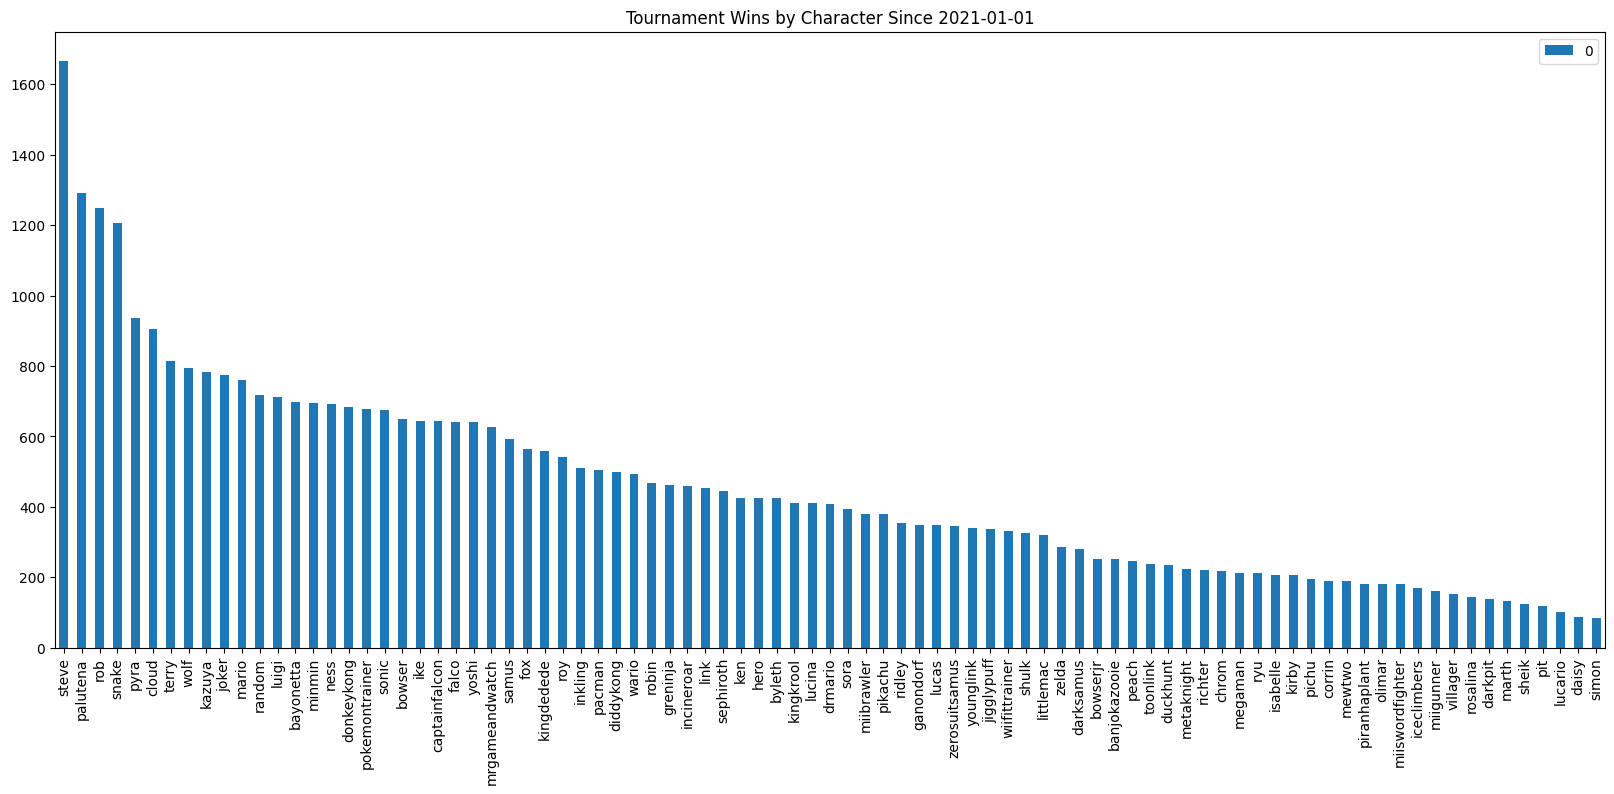

In [177]:
df.plot(kind='bar', title="Tournament Wins by Character Since 2021-01-01", figsize=(20,8))

In [179]:
df.to_clipboard()